In [1]:
import mne
import matplotlib.pyplot as plt

In [2]:
cd C:\Users\EzgiOzgen\Desktop\Bitirme\eeg-during-mental-arithmetic-tasks-1.0.0

C:\Users\EzgiOzgen\Desktop\Bitirme\eeg-during-mental-arithmetic-tasks-1.0.0


In [4]:
fname="Subject01_1.edf"

In [5]:
raw=mne.io.read_raw_edf(fname)

Extracting EDF parameters from C:\Users\EzgiOzgen\Desktop\Bitirme\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Using matplotlib as 2D backend.


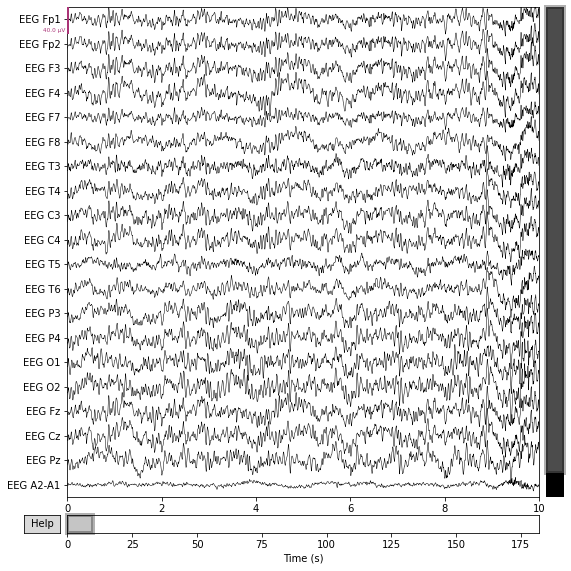

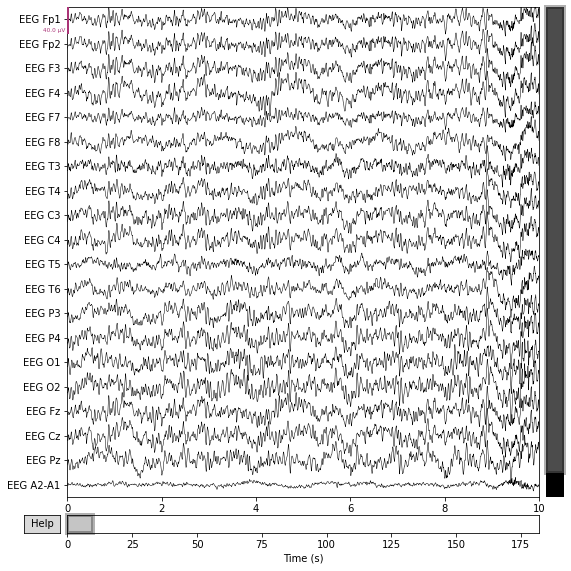

In [6]:
raw.plot()

In [7]:
import numpy as np
import pandas as pd
header = ','.join(raw.ch_names)
np.savetxt('egg_data1_1.csv', raw.get_data().T, delimiter=',', header=header)


In [8]:
fname2="Subject01_2.edf"

In [9]:
raw2=mne.io.read_raw_edf(fname2)

Extracting EDF parameters from C:\Users\EzgiOzgen\Desktop\Bitirme\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


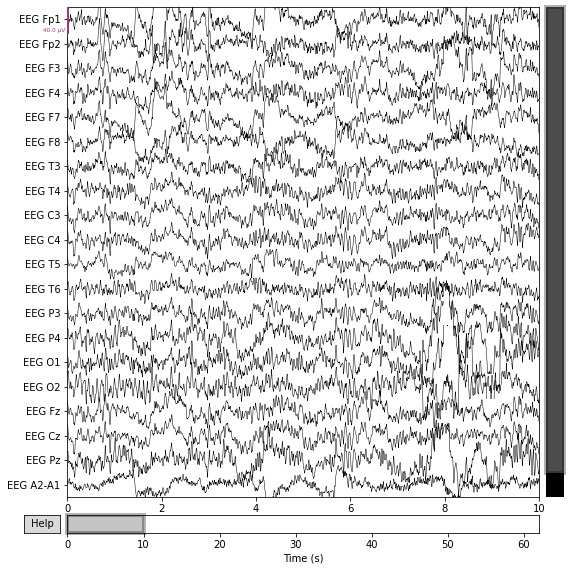

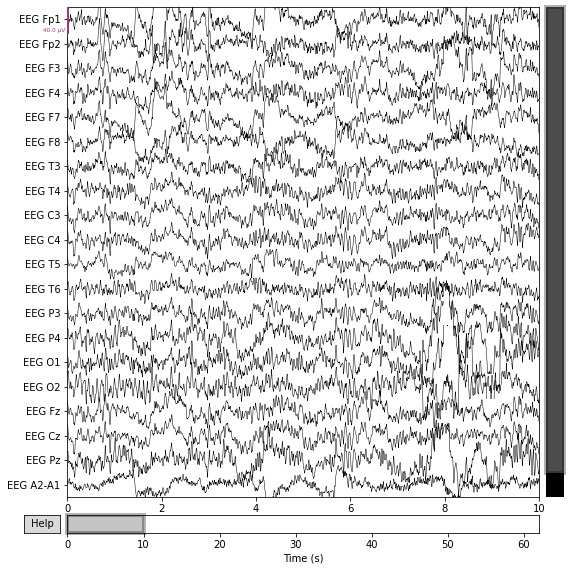

In [10]:
raw2.plot()

In [109]:
header = ','.join(raw2.ch_names)
np.savetxt('egg_data1_2.csv', raw2.get_data().T, delimiter=',', header=header)

In [110]:
df = pd.read_csv('egg_data1_1.csv', delimiter=',')
df["label"]=0

In [111]:
df2 = pd.read_csv('egg_data1_2.csv', delimiter=',')
df2["label"]=1

In [129]:
df_new=pd.concat([df, df2],ignore_index=True)
df_new.shape


(122000, 22)

In [ ]:
X = df_new.iloc[:,df_new.columns != "label"].values
y = df_new.iloc[:, -1].values

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [114]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_train)
pca = PCA(n_components = 13, whiten= True)
pca.fit(data_rescaled )
df_pca= pca.transform(data_rescaled )
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))


variance ratio:  [0.57843899 0.10328508 0.08403172 0.04082888 0.02855502 0.02578228
 0.02437851 0.01890342 0.01726237 0.0132705  0.01291798 0.01052327
 0.00891828]
sum:  0.9670963177928611


In [115]:
df_sns = pd.DataFrame({'var': pca.explained_variance_ratio_,
                'PCA': ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']})

df_sns

,var,PCA
0,0.578439,PC1
1,0.103285,PC2
2,0.084032,PC3
3,0.040829,PC4
4,0.028555,PC5
5,0.025782,PC6
6,0.024379,PC7
7,0.018903,PC8
8,0.017262,PC9
9,0.013271,PC10


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [131]:
print(X_train.shape, X_test.shape)

(97600, 9) (24400, 9)


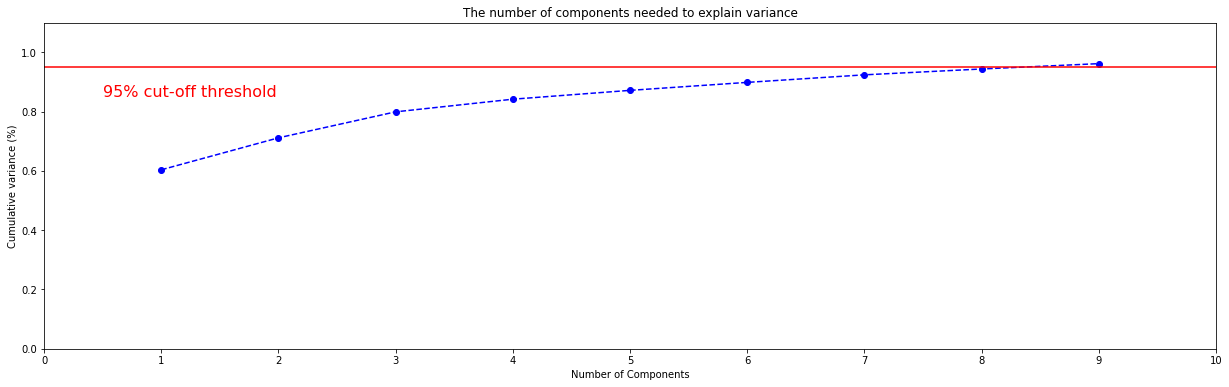

In [133]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,6)


xi = np.arange(1,10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [134]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)
logisticRegr.score(X_test, y_test)

0.7459426229508197

In [135]:
print(y_test,y_pred)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]
